In [ ]:
# Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.
# Ans 1: Boosting is an iterative machine learning technique that combines multiple weak learners (simple models that perform only slightly
# better than random chance) into a single, strong predictive model. It improves weak learners by training them sequentially, with each new
#  model focusing on and correcting the errors made by the previous ones by giving more weight to misclassified data points.

#  Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
# Ans 2: AdaBoost
# Mechanism: Adjusts the weights of data points after each iteration. Examples that are misclassified by the current model get a higher
# weight, increasing their importance for the next model.
# Model weighting: Assigns different weights to individual models in the final prediction based on their performance.
# Learner complexity: Typically uses very simple models, often decision stumps (decision trees with one split).
# Gradient Boosting
# Mechanism: Each new model is trained to correct the errors (residuals) of the combined previous models. It does this by fitting a new
#  model to the negative gradient of the loss function.
# Model weighting: Models are generally weighted equally, with a small learning rate applied to scale the contribution of each new model.
# Learner complexity: Can use more complex models than AdaBoost, such as decision trees with more levels.

# Question 3: How does regularization help in XGBoost?
# Ans 3: Regularization helps XGBoost by adding penalties to the objective function to prevent overfitting, which improves the model's
# ability to generalize to new data. It achieves this through built-in L1 (Lasso) and L2 (Ridge) penalties, as well as by controlling tree
# complexity with hyperparameters like max_depth and gamma.

# Question 4: Why is CatBoost considered efficient for handling categorical data?
# Ans 4: CatBoost is efficient for categorical data because it uses a method called Ordered Boosting to automatically
#  handle and encode them without requiring manual preprocessing steps like one-hot or label encoding.

# Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
# Ans 5: Boosting is preferred in real-world applications where accuracy is paramount, especially for tasks with high bias (underfitting),
#  such as predicting customer churn, financial forecasting, ad click prediction, and improving the accuracy of optical character recognition
#   (OCR).



In [1]:
# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9708


In [3]:
# Question 7: Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.7803


In [4]:
# Question 8: Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:")
print(best_params)
print(f"\nModel Accuracy: {accuracy:.4f}")


Best Hyperparameters:
{'learning_rate': 0.3}

Model Accuracy: 0.9649


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:07:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.8 MB/s eta 0:00:00


Model Accuracy: 0.9766


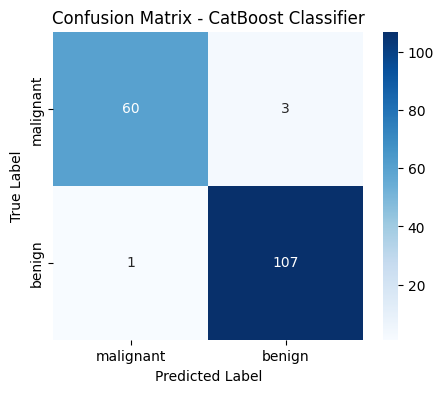

In [7]:
# Question 9: Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Question 10: You're working for a FinTech company trying to predict loan default using
# customer demographics and transaction behavior.
# The dataset is imbalanced, contains missing values, and has both numeric and
# categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
# ● Data preprocessing & handling missing/categorical values
# ● Choice between AdaBoost, XGBoost, or CatBoost
# ● Hyperparameter tuning strategy
# ● Evaluation metrics you'd choose and why
# ● How the business would benefit from your model


# 1) Data preprocessing & missing / categorical handling

# Audit: check class balance, missingness pattern, cardinality of categorical features, date fields (for temporal split).

# Split first: create time-aware train/validation/test (or stratified if no time). Never leak future info.

# Missing values

# Numeric: impute using median or model-based (KNN) on training set only; add is_missing flags for important vars.

# Categorical: fill with "MISSING" or a special token; consider frequency encoding for high-cardinality.

# If using CatBoost/LightGBM, they can naturally handle missing values — still keep is_missing flags if informative.

# Categorical encoding

# CatBoost: pass raw categories (native handling).

# XGBoost/LightGBM: use target / mean encoding with out-of-fold (OOF) scheme or frequency encoding; avoid naive target encoding leak. One-hot only for low-cardinality.

# Feature engineering

# Transaction aggregates (RFM, recency, rolling averages), ratios, behavioral flags, trend features (use past windows only).

# Create interaction / domain features if meaningful.

# Scale: not required for tree boosters; OK to skip.

# 2) Choice: AdaBoost vs XGBoost vs CatBoost

# CatBoost — first choice for mixed data + many categorical features (native handling, low encoding leakage), robust defaults.

# XGBoost / LightGBM — when you want max speed/control and custom tuning; LightGBM is fast for large data. Use careful encoding.

# AdaBoost — rarely ideal for messy/imbalanced tabular finance data (sensitive to noise); use only for simple baselines.

# Recommendation: start with CatBoost (or LightGBM); benchmark XGBoost if you need extra performance tuning.

# 3) Hyperparameter tuning strategy

# Split / CV: use time-series CV (rolling) if data is temporal; else StratifiedKFold. Use OOF to avoid leakage.

# Search method: RandomizedSearch or Bayesian (Optuna) for efficiency; narrow with grid for final tuning.

# Key params to tune

# learning_rate (0.01–0.2), n_estimators (100–5000 w/ early stopping), max_depth (3–10), subsample (0.6–1.0), colsample_bytree (0.5–1.0), l2_leaf_reg/reg_alpha/reg_lambda, min_child_samples/min_child_weight.

# For class imbalance: scale_pos_weight (XGBoost) or class_weights/balanced sampling. CatBoost: use auto_class_weights='Balanced' or class_weights.

# Early stopping on validation metric (use generous n_rounds + early stopping rounds).

# Nested CV when you need an unbiased generalization estimate for model selection.

# 4) Evaluation metrics & why

# Primary: PR-AUC (precision–recall AUC) — informative with imbalanced positive class (defaults).

# Secondary: ROC-AUC (global separability), Recall@k / Precision@k and Top-decile lift (business targeting).

# Calibration: Brier score + calibration plot — probabilities must be reliable for credit decisions. Calibrate with isotonic / Platt if needed.

# Cost-sensitive metrics: expected monetary loss / expected ROI using business cost matrix (FP vs FN costs). Use this for final threshold selection.

# Stability: report mean ± std across CV folds and time slices.

# Explainability checks: SHAP summary + SHAP dependence for top drivers, plus subgroup fairness checks.

# 5) Business value & deployment considerations

# Better risk stratification: higher recall on likely defaulters → fewer bad loans or targeted interventions (collections, credit limits).

# Profit-driven decisions: convert calibrated probabilities to pricing/limit decisions to maximize expected profit / minimize loss.

# Regulatory & auditability: SHAP explanations + simple fallback model (logistic) for transparency.

# Operationalization: monitor model/data drift, score distributions, and business KPIs; set retrain triggers (time or performance drop).

# Risk controls: simulate threshold impacts on portfolio (provisioning, capital) before rollout.